<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="https://raw.githubusercontent.com/DataForScience/Networks/master/data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0" width=150px> </div>
    <div style="float: left; margin-left: 10px;"> <h1>Effect of Vaccination on Disease Prevalence</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt 

import requests

import watermark

%load_ext watermark
%matplotlib inline

We start by print out the versions of the libraries we're using for future reference

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.10.9
IPython version      : 8.10.0

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 22.5.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: dbde4540ea5e768f764225ff2efd14962858a1ad

pandas    : 1.5.3
requests  : 2.28.1
matplotlib: 3.7.0
numpy     : 1.23.5
watermark : 2.4.2



# Code

We start by downloading the [data](https://graphics.wsj.com/infectious-diseases-and-vaccines/data/datum.json) used by the [WSJ visualization](http://graphics.wsj.com/infectious-diseases-and-vaccines/). You can find it at:

In [3]:
url = 'https://graphics.wsj.com/infectious-diseases-and-vaccines/data/datum.json'

And download it with a simple request

In [4]:
req = requests.get(url)

We can check that it all went well

In [5]:
req.status_code

200

And convert the raw data into a JSON object

In [6]:
raw_data = req.json()

Get a quick dictionary mapping each dataset to its location in the JSON array. In total, there are 7 different datasets

In [7]:
data_dict = {data['id']: i for i, data in enumerate(raw_data)}
data_dict

{'measles': 0,
 'hepatitisA': 1,
 'mumps': 2,
 'pertussis': 3,
 'polio': 4,
 'rubella': 5,
 'smallpox': 6}

For simplicity, we'll visualize just one of the datasets, the one for measles. You can try out the others by changing your selection here.

In [8]:
selected_dataset = raw_data[data_dict["measles"]]['data']

We can now generate a pandas DataFrame from the selected dataset

In [9]:
data = pd.DataFrame(selected_dataset['values']['data'], 
                    columns=['Year', 'State', 'value'])
data

,Year,State,value
0,1928,0,NaN
1,1928,1,334.962121
2,1928,2,481.808338
3,1928,3,200.710901
4,1928,4,69.189746
...,...,...,...
4329,2012,46,0.000000
4330,2012,47,0.000000
4331,2012,48,0.000000
4332,2012,49,0.000000


We also have information about when the vaccine became available

In [10]:
vaccine_year = selected_dataset['chart_options']['vaccine_year']
vaccine_year

1963

Finally, we use a pivot table to put our dataset into the final form that we can visualize using a heatmap, with states as rows and years as columns

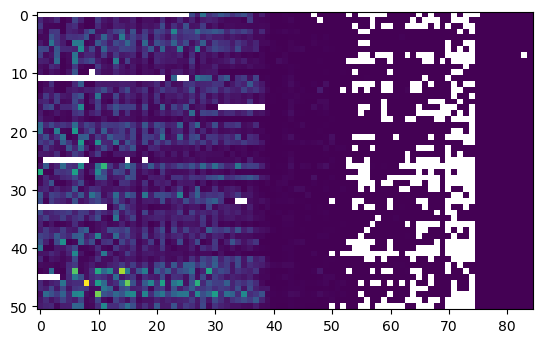

In [11]:
img = pd.pivot_table(data, index='State', columns='Year', values='value')
plt.imshow(img)

The column for the vaccine year is then given by:

In [12]:
vaccine_pos = vaccine_year - data.Year.min()

Which we can easily add to our figure. We also make the figure larger for the sake of ease of visualization

Text(35, -1, 'Vaccine introduced')

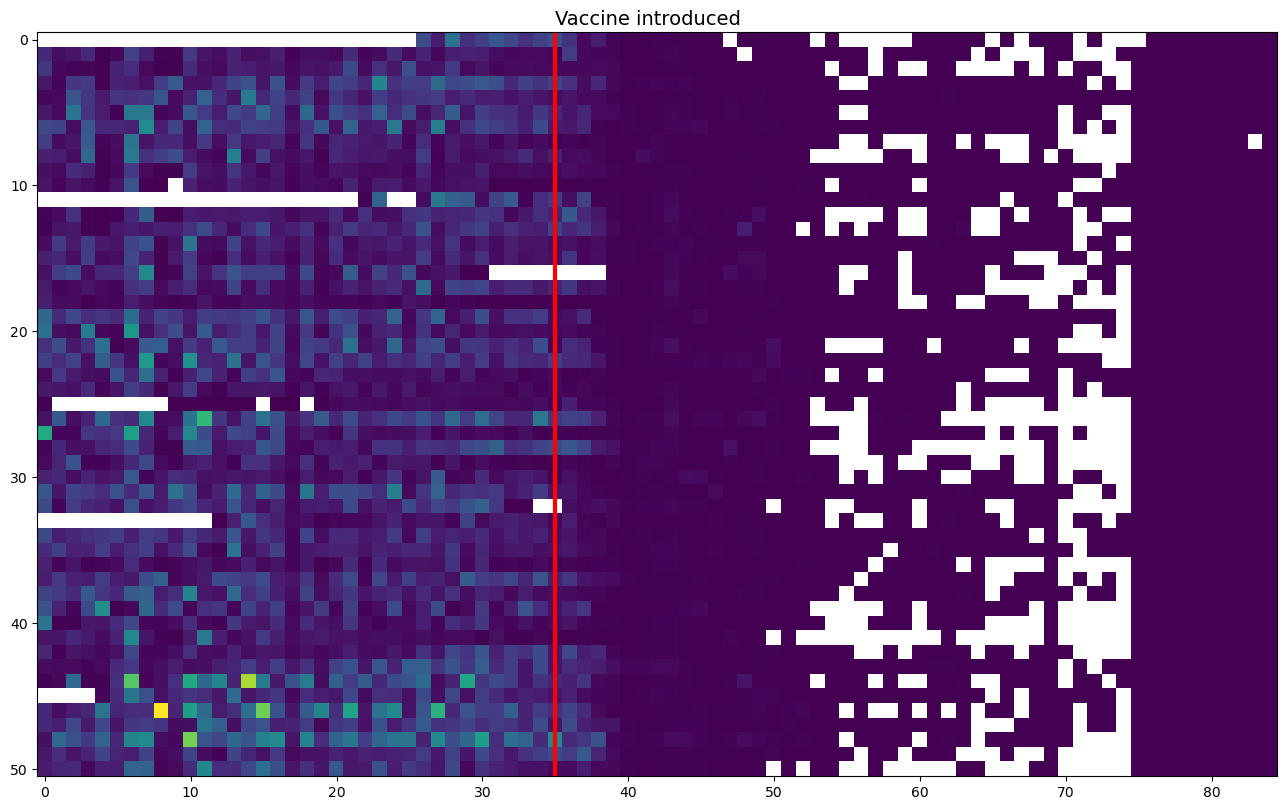

In [13]:
# Create a figure and axis with a pre defined size
fig, ax = plt.subplots(1, figsize=(16, 10))

# Generate a histogram of the data
im = ax.imshow(img)

# Add the vertical line indicating when vaccines became available
ax.axvline(x=vaccine_pos, linewidth=3, color='red')
ax.text(x=vaccine_pos, y=-1, s='Vaccine introduced', fontsize=14)

A heatmap isn't very helpful without a color bar to identify which value is which, so we also add one

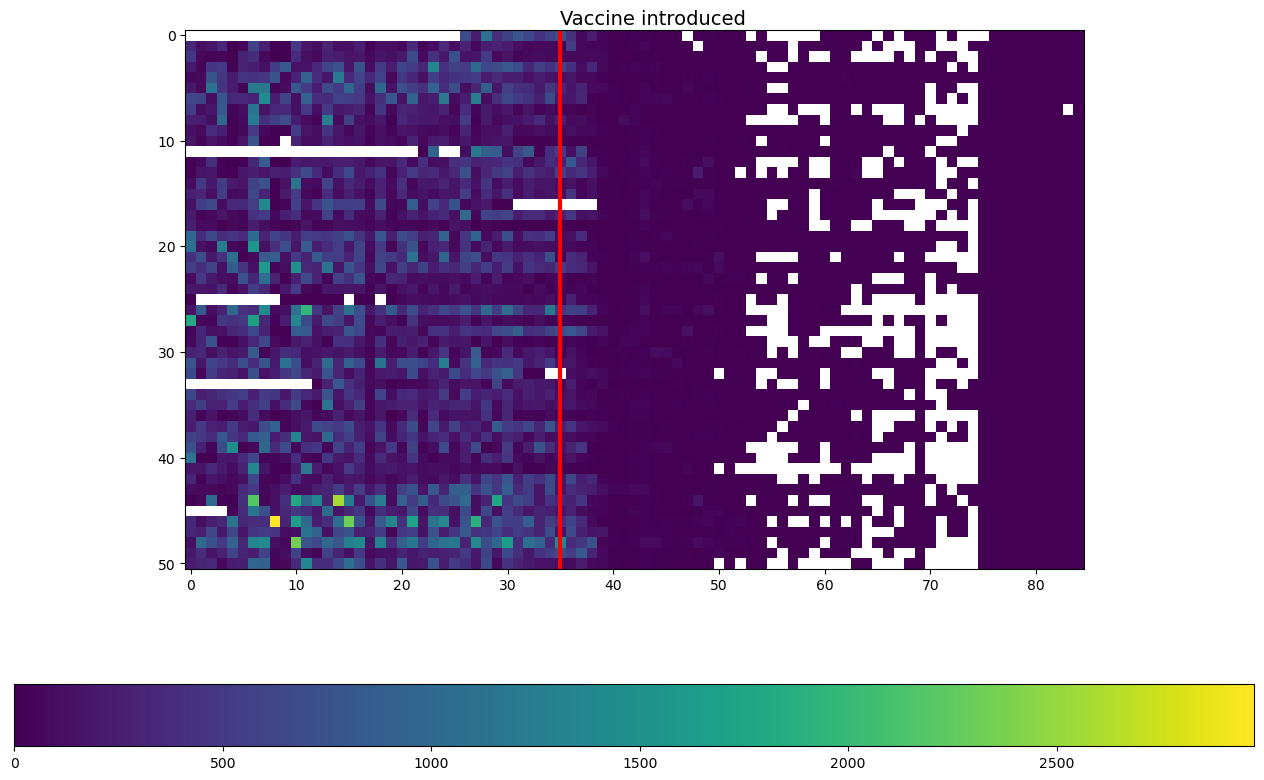

In [14]:
# Create a figure and axis with a pre defined size
fig, ax = plt.subplots(1, figsize=(16, 10))

# Generate a histogram of the data
im = ax.imshow(img)

# Add the vertical line indicating when vaccines became available
ax.axvline(x=vaccine_pos, linewidth=3, color='red')
ax.text(x=vaccine_pos, y=-1, s='Vaccine introduced', fontsize=14)

# Add the color bar
fig.colorbar(im, orientation='horizontal')

Unfortunately, the default color bar is a bit too large for our purpose and is causing our main figure to be shrunk. We manually set the color bar size into something more manageable

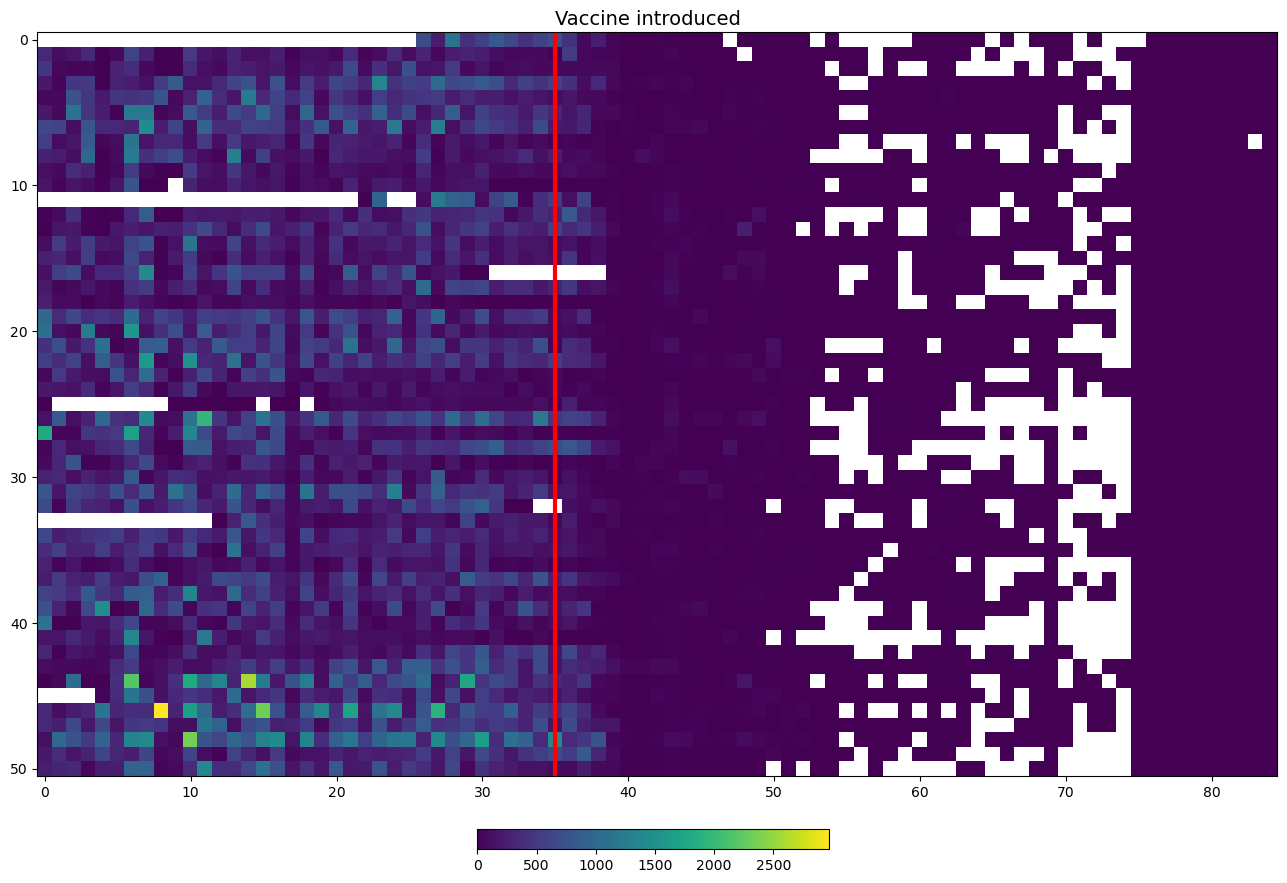

In [15]:
# Create a figure and axis with a pre defined size
fig, ax = plt.subplots(1, figsize=(16, 10))

# Generate a histogram of the data
im = ax.imshow(img)

# Add the vertical line indicating when vaccines became available
ax.axvline(x=vaccine_pos, linewidth=3, color='red')
ax.text(x=vaccine_pos, y=-1, s='Vaccine introduced', fontsize=14)

# Set the size of the axis for the color bar
cax = fig.add_axes([0.4, 0.05, 0.22, 0.02])

# Add the color bar
fig.colorbar(im, cax=cax, orientation='horizontal')

Next we add the correct tick labels for the x and y axes.

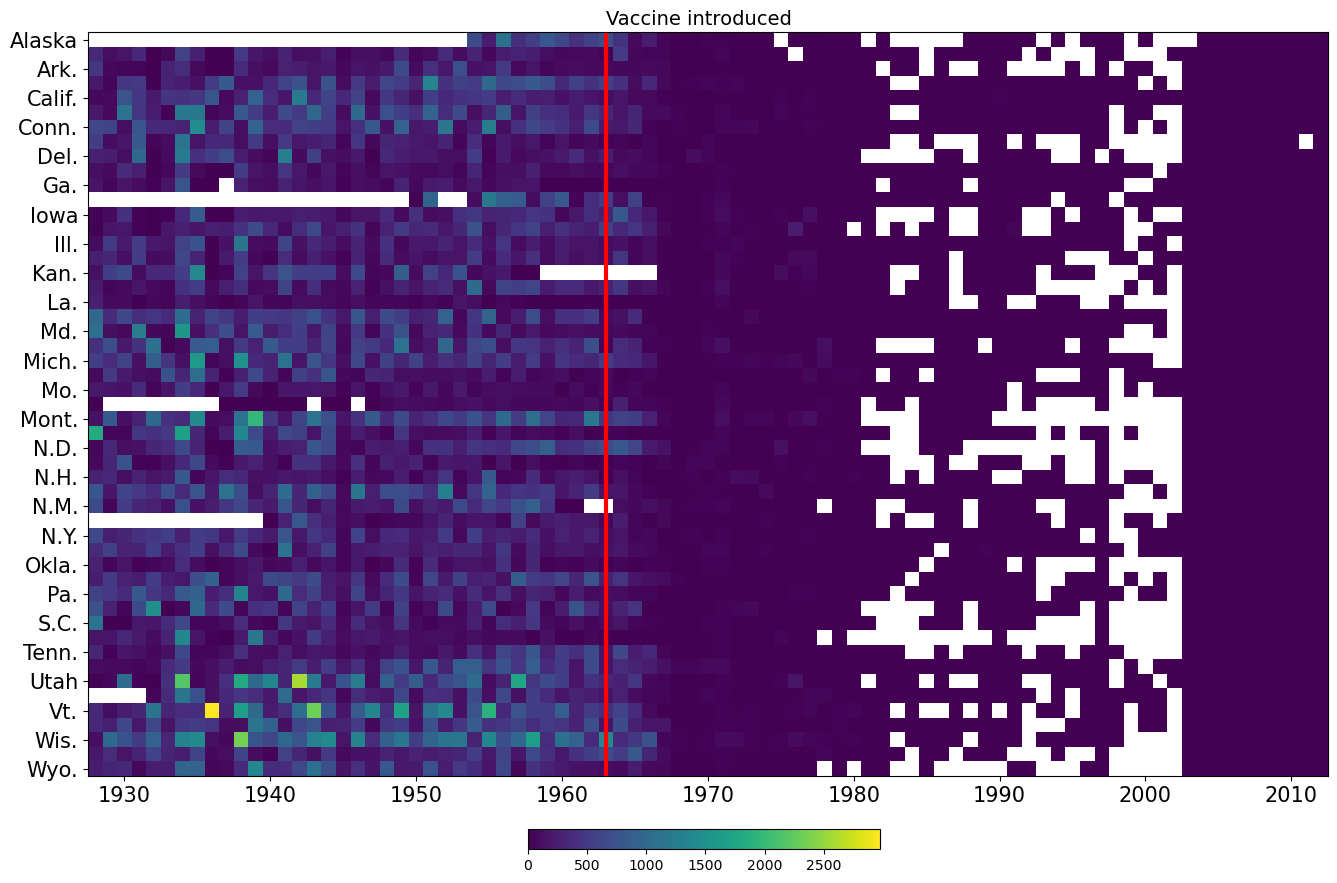

In [16]:
# Create a figure and axis with a pre defined size
fig, ax = plt.subplots(1, figsize=(16, 10))

# Generate a histogram of the data
im = ax.imshow(img)

# Add the vertical line indicating when vaccines became available
ax.axvline(x=vaccine_pos, linewidth=3, color='red')
ax.text(x=vaccine_pos, y=-1, s='Vaccine introduced', fontsize=14)

# Set the size of the axis for the color bar
cax = fig.add_axes([0.4, 0.05, 0.22, 0.02])

# Add the color bar
fig.colorbar(im, cax=cax, orientation='horizontal')

# Fix the x-axis ticks and labels
ax.set_xticks(np.arange(2, img.shape[1], 10))
ax.set_xticklabels(np.arange(2, img.shape[1], 10)+1928, fontsize=15)

# Fix the y-axis ticks and labels
ax.set_yticks(np.arange(0,51,2))
ax.set_yticklabels([
    'Alaska', 'Ark.',  'Calif.', 'Conn.', 'Del.', 
    'Ga.',    'Iowa',  'Ill.',   'Kan.',  'La.', 
    'Md.',    'Mich.', 'Mo.',    'Mont.', 'N.D.',
    'N.H.',   'N.M.',  'N.Y.',   'Okla.', 'Pa.',
    'S.C.',   'Tenn.', 'Utah',   'Vt.',   'Wis.',
    'Wyo.'], fontsize=15);

# Custom colormap

The only tricky part to this figure is creating a custom color scheme for our heatmap. We achieve this by using LinearSegmentColormap

In [17]:
cvals  = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]

colors=[
    "#ddebf8",
    "#0c9dc5",
    "#44ae57",
    "#fcd43d",
    "#e59e26",
    "#e48925",
    "#e95034",
    "#da4b31",
    "#cf472e"]

norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm, cvals), colors))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)

Resulting in a colormap object we can easily use in our figure:

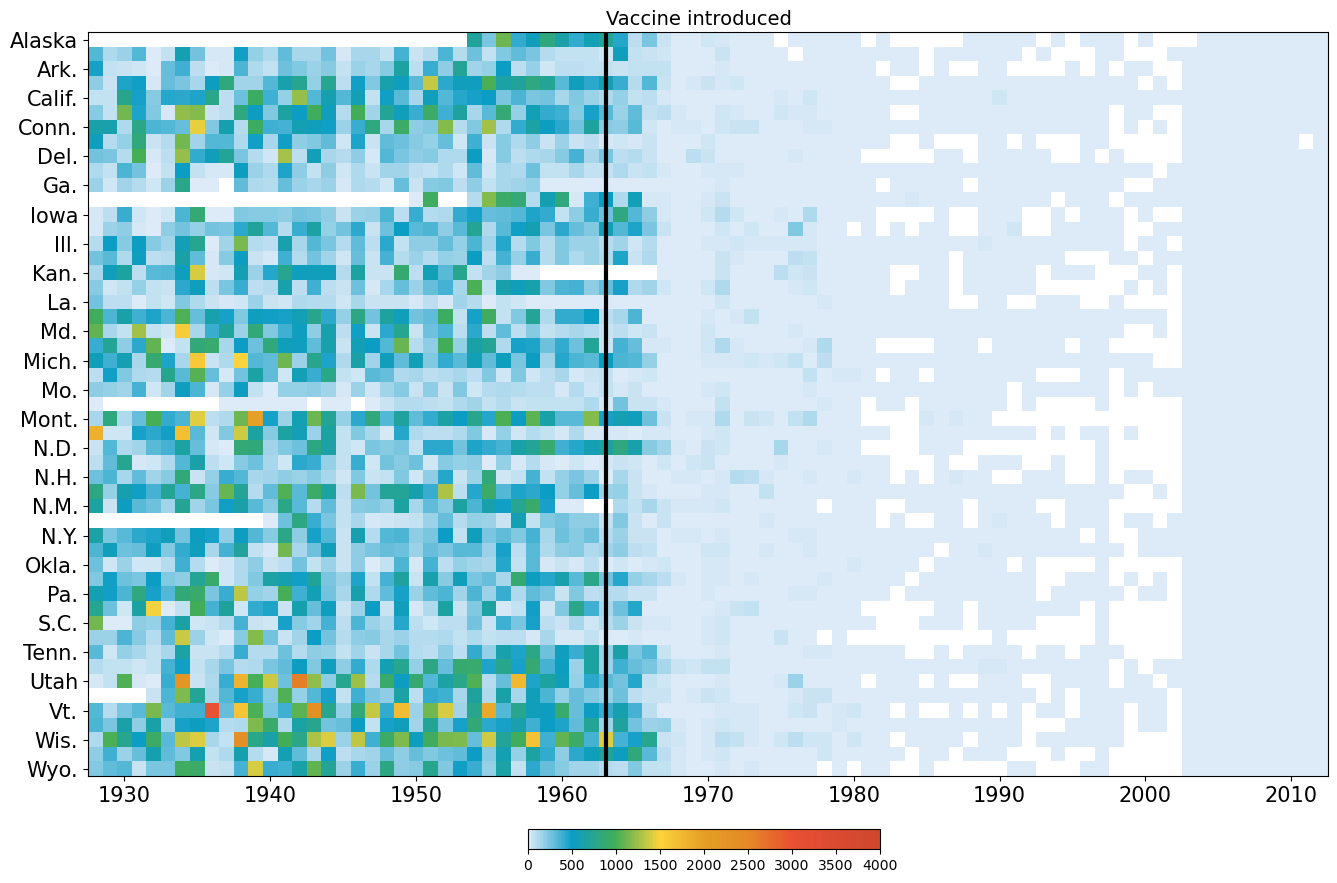

In [18]:
# Create a figure and axis with a pre defined size
fig, ax = plt.subplots(1, figsize=(16, 10))

# Generate a histogram of the data
# With our custom color map
im = ax.imshow(img, cmap=cmap, vmin=0, vmax=4000)

# Add the vertical line indicating when vaccines became available
# Use black for the line color
ax.axvline(x=vaccine_pos, linewidth=3, color='black')
ax.text(x=vaccine_pos, y=-1, s='Vaccine introduced', fontsize=14)

# Set the size of the axis for the color bar
cax = fig.add_axes([0.4, 0.05, 0.22, 0.02])

# Add the color bar
fig.colorbar(im, cax=cax, orientation='horizontal')

# Fix the x-axis ticks and labels
ax.set_xticks(np.arange(2, img.shape[1], 10))
ax.set_xticklabels(np.arange(2, img.shape[1], 10)+1928, fontsize=15)

# Fix the y-axis ticks and labels
ax.set_yticks(np.arange(0,51,2))
ax.set_yticklabels([
    'Alaska', 'Ark.',  'Calif.', 'Conn.', 'Del.', 
    'Ga.',    'Iowa',  'Ill.',   'Kan.',  'La.', 
    'Md.',    'Mich.', 'Mo.',    'Mont.', 'N.D.',
    'N.H.',   'N.M.',  'N.Y.',   'Okla.', 'Pa.',
    'S.C.',   'Tenn.', 'Utah',   'Vt.',   'Wis.',
    'Wyo.'], fontsize=15);

Finally, we clean up the color bar to make sure it matches the original one

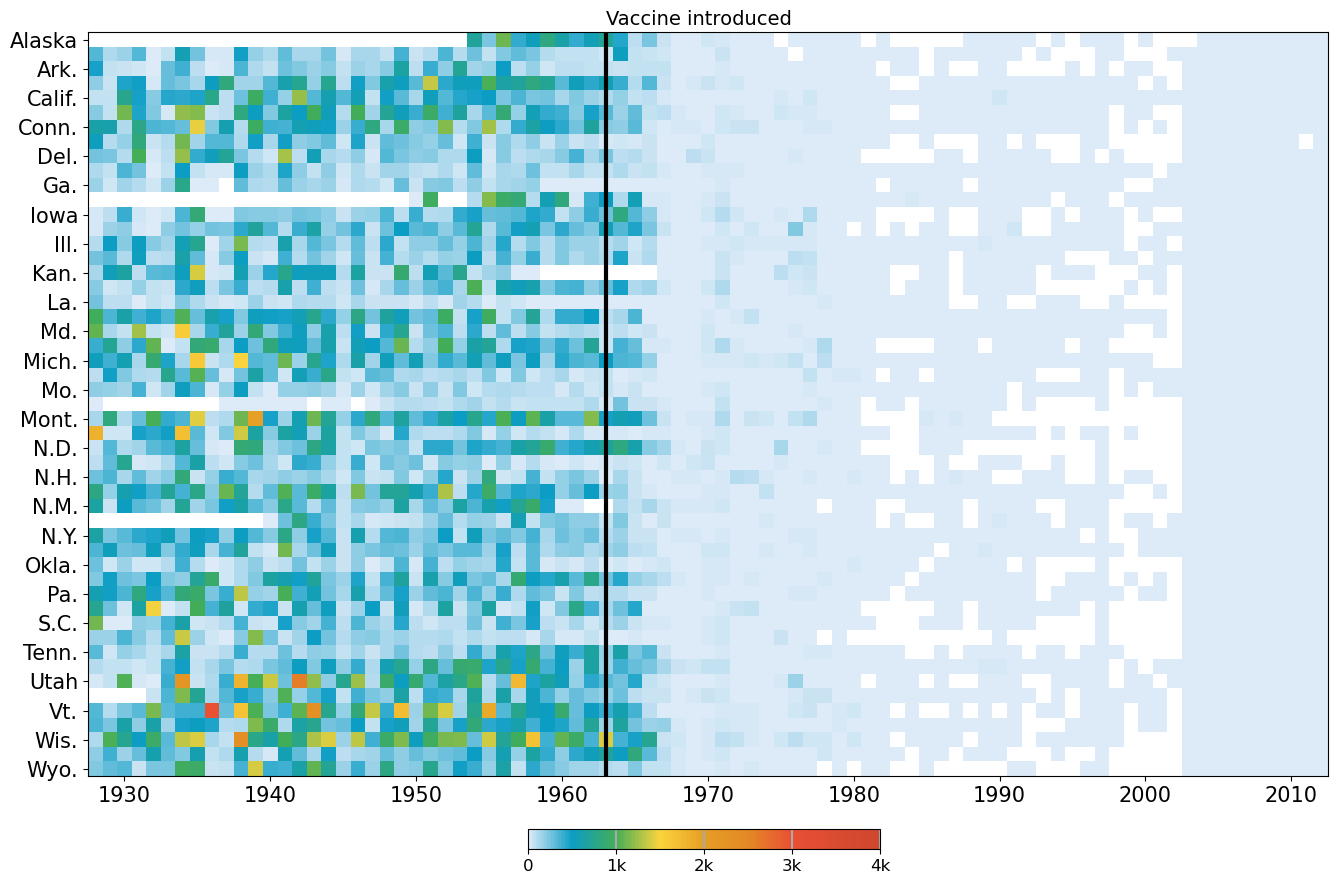

In [19]:
# Create a figure and axis with a pre defined size
fig, ax = plt.subplots(1, figsize=(16, 10))

# Generate a histogram of the data
# With our custom color map
im = ax.imshow(img, cmap=cmap, vmin=0, vmax=4000)

# Add the vertical line indicating when vaccines became available
# Use black for the line color
ax.axvline(x=vaccine_pos, linewidth=3, color='black')
ax.text(x=vaccine_pos, y=-1, s='Vaccine introduced', fontsize=14)

# Set the size of the axis for the color bar
cax = fig.add_axes([0.4, 0.05, 0.22, 0.02])

# Add the color bar
fig.colorbar(im, cax=cax, orientation='horizontal')

# Fix the x-axis ticks and labels
ax.set_xticks(np.arange(2, img.shape[1], 10))
ax.set_xticklabels(np.arange(2, img.shape[1], 10)+1928, fontsize=15)

# Fix the y-axis ticks and labels
ax.set_yticks(np.arange(0,51,2))
ax.set_yticklabels([
    'Alaska', 'Ark.',  'Calif.', 'Conn.', 'Del.', 
    'Ga.',    'Iowa',  'Ill.',   'Kan.',  'La.', 
    'Md.',    'Mich.', 'Mo.',    'Mont.', 'N.D.',
    'N.H.',   'N.M.',  'N.Y.',   'Okla.', 'Pa.',
    'S.C.',   'Tenn.', 'Utah',   'Vt.',   'Wis.',
    'Wyo.'], fontsize=15);

# Fix the ticks and labels for the color bar
cax.set_xticks([0, 1000, 2000, 3000, 4000])
cax.set_xticklabels([0, "1k", "2k", "3k", "4k"], fontsize=12)

# Add the vertical divisions of the color bar
cax.axvline(x=1000, color='darkgray')
cax.axvline(x=2000, color='darkgray')
cax.axvline(x=3000, color='darkgray')
cax.axvline(x=4000, color='darkgray');

<center>
     <img src="https://raw.githubusercontent.com/DataForScience/Networks/master/data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</center>